# Credit Card Fraud Detection

In [5]:
import pandas as pd
import numpy as np # linear algebra
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, SCORERS, precision_recall_curve
from sklearn.metrics import average_precision_score, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, LeaveOneOut

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

import graphviz

from sklearn.utils import resample

In [21]:
def score_prediction(y_test, y_pred):
    print(f'Accuracy:  {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall:    {recall_score(y_test, y_pred):.3f}')
    print(f'F1:        {f1_score(y_test, y_pred):.3f}')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
df = pd.read_csv('input/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


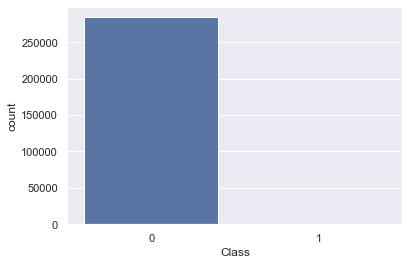

In [7]:
sns.countplot(df['Class']);

In [9]:
good = df[df['Class']==0]
fraud = df[df['Class']==1]

print(f'Fraudulent transactions: {len(fraud):,}; Good transactions: {len(good):,}')

Fraudulent transactions: 492; Good transactions: 284,315


## Full sample

In [43]:
#spliting the data for target and features
X = df.drop(columns=['Class'], axis=1)
y = df['Class'] #.astype('int')

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size = 0.7, random_state=42, stratify=y) # 
print(X_train.shape, X_test.shape)
print(f'Ratio of fraudulent transactions in train dataset: {y_train.mean()}, in test dataset: {y_test.mean()}')

(199364, 30) (85443, 30)
Ratio of fraudulent transactions in train dataset: 0.0017254870488152324, in test dataset: 0.0017321489179921118


In [50]:
y_pred = np.zeros(y_test.shape)
score_prediction(y_test, y_pred)

Accuracy:  0.998
Precision: 0.000
Recall:    0.000
F1:        0.000


/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
clf_tree = DecisionTreeClassifier(min_samples_split=5)
model_tree = clf_tree.fit(X_train, y_train)

In [49]:
y_pred = model_tree.predict(X_test)
score_prediction(y_test, y_pred)

Accuracy:  0.999
Precision: 0.765
Recall:    0.703
F1:        0.732


## Simple under sampling

In [72]:
df_majority = X_train[y_train == 0]
df_minority = X_train[y_train == 1]
size_minor = len(df_minority)

y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                   replace=False,    # sample with replacement
                   n_samples=size_minor,    # to match majority class
                   random_state=42)  # reproducible results

X_down_train = pd.concat([df_minority, df_majority_downsampled])
# print(X_down_train.shape)

y_majority_downsampled = y_majority[X_down.index]
y_down_train = pd.concat([y_minority, y_majority_downsampled])
# y_down_train.value_counts()

# sns.countplot(y_down_train);

In [71]:
clf_tree_down = DecisionTreeClassifier(min_samples_split=5)
model_tree_down = clf_tree_down.fit(X_down_train, y_down_train)
y_pred = model_tree_down.predict(X_test)
score_prediction(y_test, y_pred)

Accuracy:  0.876
Precision: 0.012
Recall:    0.885
F1:        0.024


In [68]:
f1_score(y_test, y_pred)

0.025304322821815394

In [78]:
for size_minor in [100, 1000, 5000, 10000, 50000, 99000]:
    
    df_majority = X_train[y_train == 0]
    df_minority = X_train[y_train == 1]

    y_majority = y_train[y_train == 0]
    y_minority = y_train[y_train == 1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                   replace=False,    # sample with replacement
                   n_samples=size_minor,    # to match majority class
                   random_state=42)  # reproducible results

    X_down_train = pd.concat([df_minority, df_majority_downsampled])
    # print(X_down_train.shape)

    y_majority_downsampled = y_majority[df_majority_downsampled.index]
    y_down_train = pd.concat([y_minority, y_majority_downsampled])
    
    clf_tree_down = DecisionTreeClassifier(min_samples_split=5)
    model_tree_down = clf_tree_down.fit(X_down_train, y_down_train)
    y_pred = model_tree_down.predict(X_test)
    print(f'Training sample size: {len(X_down_train):,}, F1-score: {f1_score(y_test, y_pred):.3f}')

Training sample size: 444, F1-score: 0.016
Training sample size: 1,344, F1-score: 0.072
Training sample size: 5,344, F1-score: 0.218
Training sample size: 10,344, F1-score: 0.332
Training sample size: 50,344, F1-score: 0.595
Training sample size: 99,344, F1-score: 0.671
